In [59]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams


In [39]:
df_filled = pd.read_csv("time_series_ass3.csv")

In [40]:
print(df_filled.columns)

Index(['Unnamed: 0', 'From', 'To (Interval: 15M)', 'PM10 (µg/m3)',
       'PM2.5 (µg/m3)', 'NO (µg/m3)'],
      dtype='object')


In [41]:
df_filled

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN
...,...,...,...,...,...,...
8635,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9
8636,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9
8637,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6
8638,8638,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8


In [42]:
df_filled.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [43]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [44]:
df_filled.nunique()

Unnamed: 0            8640
From                  8640
To (Interval: 15M)    8640
PM10 (µg/m3)           375
PM2.5 (µg/m3)          244
NO (µg/m3)             774
dtype: int64

In [45]:
df_filled.shape

(8640, 6)

In [46]:
df_filled.isnull().sum()

Unnamed: 0               0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64

### Pre-Prossessing of Data

In [49]:
df_filled.columns = df_filled.columns.str.strip()
df_filled['From'] = pd.to_datetime(df_filled['From'])
df_filled['To (Interval: 15M)'] = pd.to_datetime(df_filled['To (Interval: 15M)'])
df_filled = df_filled.set_index('From')
df_filled.head()

,Unnamed: 0,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,,
2023-02-01 00:00:00,0,2023-02-01 00:15:00,95.0,35.0,NaN
2023-02-01 00:15:00,1,2023-02-01 00:30:00,95.0,35.0,NaN
2023-02-01 00:30:00,2,2023-02-01 00:45:00,95.0,35.0,NaN
2023-02-01 00:45:00,3,2023-02-01 01:00:00,122.0,34.0,NaN
2023-02-01 01:00:00,4,2023-02-01 01:15:00,122.0,34.0,NaN


In [50]:
df_resampled = df.resample('15T').mean()
display(df_resampled.head())

C:\Users\suyas\AppData\Local\Temp\ipykernel_15652\1374135144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('15T').mean()


,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,
2023-02-01 00:00:00,0.0,95.0,35.0,NaN
2023-02-01 00:15:00,1.0,95.0,35.0,NaN
2023-02-01 00:30:00,2.0,95.0,35.0,NaN
2023-02-01 00:45:00,3.0,122.0,34.0,NaN
2023-02-01 01:00:00,4.0,122.0,34.0,NaN


In [62]:
import seaborn as sns
sns.set_style('whitegrid')

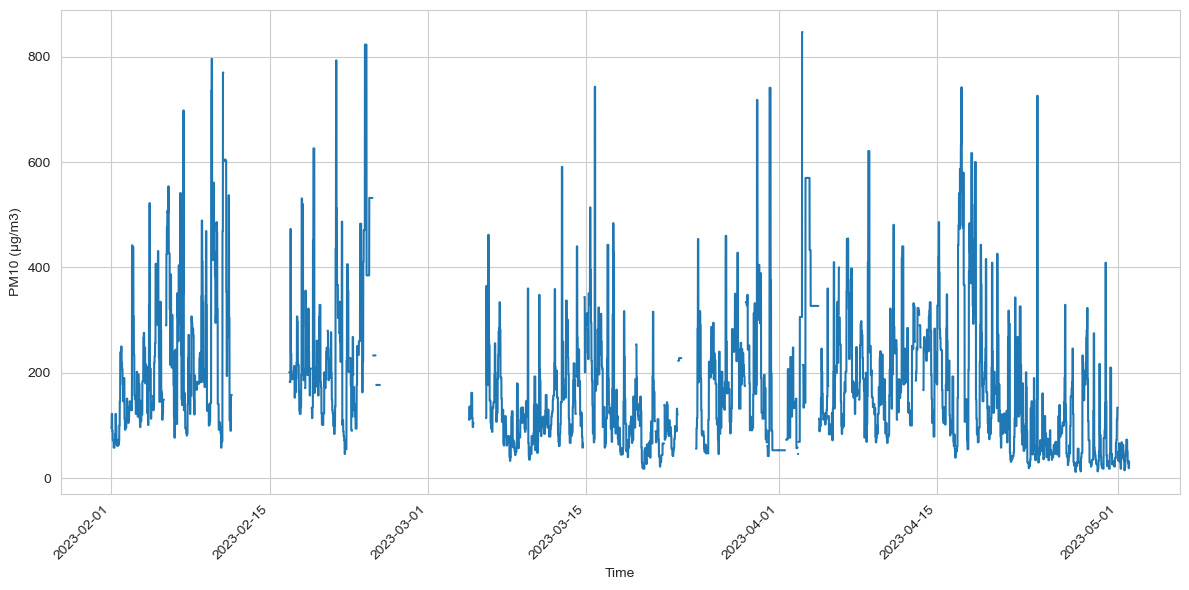

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['PM10 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM10 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

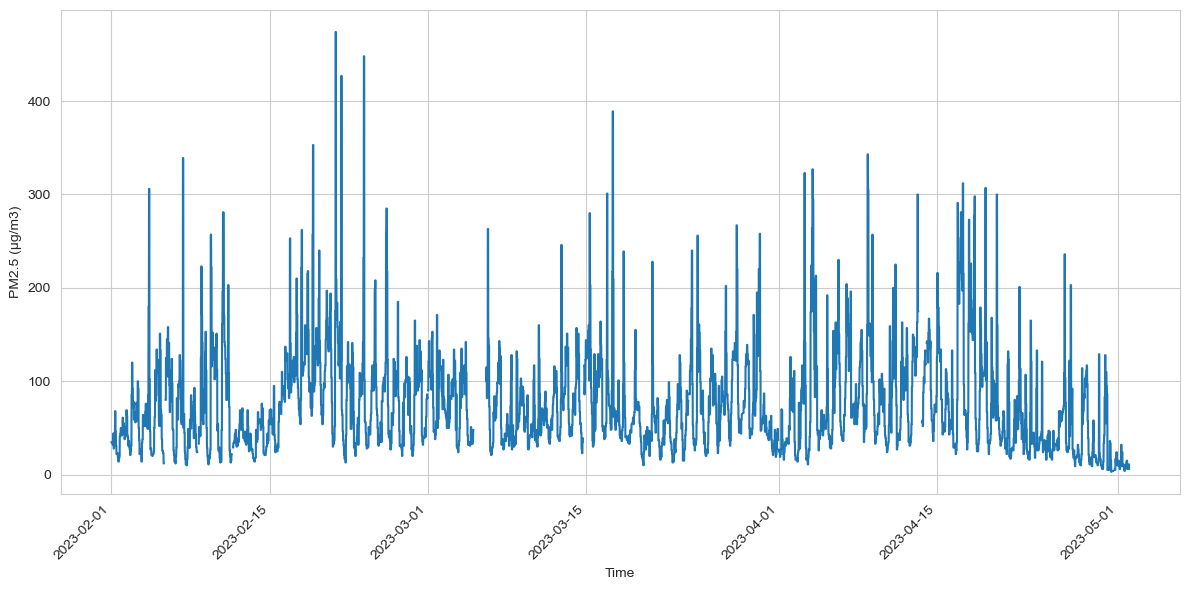

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['PM2.5 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

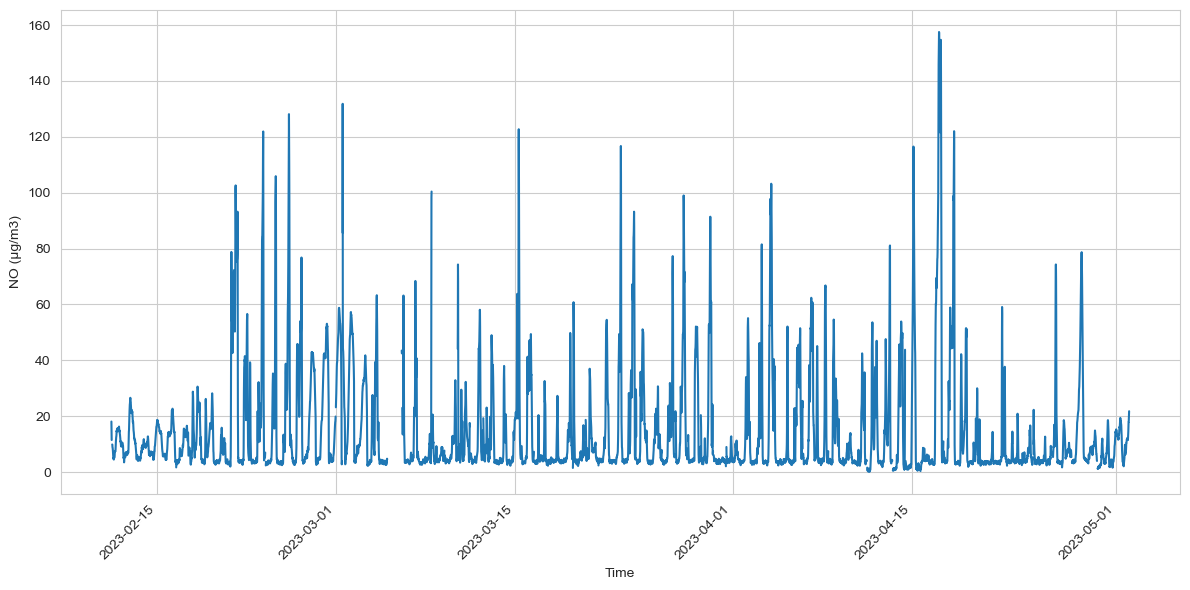

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['NO (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('NO (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [66]:
df_filled.isnull().sum()

Unnamed: 0               0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64

In [67]:
df_filled.describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8640.000000,6959.000000,8414.000000,7271.000000
mean,4319.500000,181.408679,75.690397,14.649636
std,2494.297496,136.016142,55.245265,19.221385
min,0.000000,12.000000,3.000000,0.100000
25%,2159.750000,84.000000,36.000000,3.900000
50%,4319.500000,145.000000,61.000000,6.100000
75%,6479.250000,238.000000,101.000000,16.500000
max,8639.000000,847.000000,474.000000,157.500000


## PM10 (µg/m3)

In [69]:
Q1 = df_filled['PM10 (µg/m3)'].quantile(0.25)
Q3 = df_filled['PM10 (µg/m3)'].quantile(0.80)

IQR = Q3 - Q1
IQR

182.0

In [70]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-189.0, 539.0)

In [71]:
df_filled[(df_filled['PM10 (µg/m3)']<lower_limit)|(df_filled['PM10 (µg/m3)']>upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,193.000000,193.000000,193.000000,139.000000
mean,4376.880829,646.512953,116.295337,32.099281
std,2632.048278,92.620704,78.658021,45.112856
min,483.000000,541.000000,11.000000,2.400000
25%,1715.000000,570.000000,50.000000,3.650000
50%,5863.000000,605.000000,108.000000,6.300000
75%,6434.000000,735.000000,177.000000,46.950000
max,7862.000000,847.000000,305.000000,157.500000


In [72]:
df_filled[(df_filled['PM10 (µg/m3)']>lower_limit)&(df_filled['PM10 (µg/m3)']<upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,6766.000000,6766.000000,6724.000000,5668.000000
mean,4747.422406,168.141590,75.271713,13.273553
std,2522.185218,111.522133,56.474502,18.041862
min,0.000000,12.000000,3.000000,0.100000
25%,3201.250000,83.250000,36.000000,3.800000
50%,5059.500000,141.000000,59.000000,5.200000
75%,6898.750000,228.000000,101.000000,14.100000
max,8639.000000,537.000000,474.000000,154.700000


In [73]:
df_filled_1 = df_filled[(df_filled['PM10 (µg/m3)'] > lower_limit) & (df_filled['PM10 (µg/m3)'] < upper_limit)]

## PM2.5 (µg/m3)

In [74]:
Q1 = df_filled['PM2.5 (µg/m3)'].quantile(0.25)
Q3 = df_filled['PM2.5 (µg/m3)'].quantile(0.80)

IQR = Q3 - Q1
IQR

75.0

In [75]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-76.5, 223.5)

In [76]:
df_filled[(df_filled['PM2.5 (µg/m3)']<lower_limit)|(df_filled['PM2.5 (µg/m3)']>upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,204.000000,186.000000,204.000000,184.000000
mean,4669.911765,334.413978,284.921569,56.558152
std,2385.520964,159.789069,55.226125,41.438043
min,319.000000,66.000000,224.000000,4.500000
25%,2141.750000,193.000000,246.000000,22.400000
50%,5308.500000,327.000000,273.000000,46.650000
75%,7183.250000,429.750000,305.000000,87.475000
max,8094.000000,770.000000,474.000000,157.500000


In [77]:
df_filled[(df_filled['PM2.5 (µg/m3)']>lower_limit)&(df_filled['PM2.5 (µg/m3)']<upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8210.000000,6731.000000,8210.000000,7014.000000
mean,4331.244823,177.070420,70.491474,13.626048
std,2500.108519,132.954015,44.017292,17.005899
min,0.000000,12.000000,3.000000,0.100000
25%,2161.250000,84.000000,36.000000,3.900000
50%,4360.500000,141.000000,59.000000,5.900000
75%,6481.750000,231.000000,98.000000,15.400000
max,8639.000000,847.000000,223.000000,154.700000


In [78]:
df_filled_2 = df_filled[(df_filled['PM2.5 (µg/m3)']>lower_limit)&(df_filled['PM2.5 (µg/m3)']<upper_limit)]

## NO (µg/m3)

In [79]:
Q1 = df_filled['NO (µg/m3)'].quantile(0.25)
Q3 = df_filled['NO (µg/m3)'].quantile(0.80)

IQR = Q3 - Q1
IQR

17.6

In [80]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-22.500000000000004, 47.900000000000006)

In [81]:
df_filled[(df_filled['NO (µg/m3)']<lower_limit)|(df_filled['NO (µg/m3)']>upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,506.000000,382.000000,506.000000,506.000000
mean,4840.332016,331.000000,163.913043,69.738538
std,2058.917879,138.502167,73.307871,23.777491
min,1902.000000,75.000000,36.000000,48.000000
25%,2716.250000,226.500000,116.000000,52.200000
50%,5212.500000,327.000000,145.000000,60.450000
75%,6934.000000,410.000000,201.250000,78.775000
max,8289.000000,793.000000,474.000000,157.500000


In [82]:
df_filled[(df_filled['NO (µg/m3)']>lower_limit)&(df_filled['NO (µg/m3)']<upper_limit)].describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,6765.000000,5425.000000,6692.000000,6765.000000
mean,4849.287509,163.449585,70.825463,10.529165
std,2220.380433,124.705911,48.312377,10.530112
min,1004.000000,12.000000,3.000000,0.100000
25%,2924.000000,75.000000,36.000000,3.800000
50%,4855.000000,130.000000,59.000000,5.400000
75%,6747.000000,213.000000,95.000000,13.200000
max,8639.000000,847.000000,448.000000,47.900000


In [83]:
df_filled_3 = df_filled[(df_filled['NO (µg/m3)']>lower_limit)&(df_filled['NO (µg/m3)']<upper_limit)]

## Fitting ARIMA Model

In [84]:
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

In [102]:
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sn

In [103]:
p = 1
d = 1
q = 1
order = (p, d, q)
model = sm.tsa.ARIMA(df_filled_1['PM10 (µg/m3)'], order=order)
model_fit = model.fit()
last_timestamp = df_filled_1.index[-1]
start_index = last_timestamp + pd.DateOffset(minutes=15)
end_index = start_index + pd.DateOffset(minutes=30) 
forecast_index = pd.date_range(start=start_index, end=end_index, freq='15T')
forecast_1 = model_fit.get_forecast(steps=len(forecast_index))
forecast_values_1 = forecast_1.predicted_mean
forecast_df_1 = pd.DataFrame(forecast_values_1, index=forecast_index, columns=['PM10 (µg/m3)'])
df_filled_1 = pd.concat([df_filled_1, forecast_df])
df_filled_1 = df_filled_1.sort_index()

C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [104]:
p = 1
d = 1
q = 1
order = (p, d, q)
model = sm.tsa.ARIMA(df_filled_2['PM10 (µg/m3)'], order=order)
model_fit = model.fit()
last_timestamp = df_filled_1.index[-1]
start_index = last_timestamp + pd.DateOffset(minutes=15)
end_index = start_index + pd.DateOffset(minutes=30) 
forecast_index = pd.date_range(start=start_index, end=end_index, freq='15T')
forecast_2 = model_fit.get_forecast(steps=len(forecast_index))
forecast_values_2 = forecast_2.predicted_mean
forecast_df_2 = pd.DataFrame(forecast_values_2, index=forecast_index, columns=['PM10 (µg/m3)'])
df_filled_2 = pd.concat([df_filled_2, forecast_df])
df_filled_2 = df_filled_1.sort_index()

C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [105]:
p = 1
d = 1
q = 1
order = (p, d, q)
model = sm.tsa.ARIMA(df_filled_1['PM10 (µg/m3)'], order=order)
model_fit = model.fit()
last_timestamp = df_filled_3.index[-1]
start_index = last_timestamp + pd.DateOffset(minutes=15)
end_index = start_index + pd.DateOffset(minutes=30) 
forecast_index = pd.date_range(start=start_index, end=end_index, freq='15T')
forecast_3 = model_fit.get_forecast(steps=len(forecast_index))
forecast_values_3 = forecast_3.predicted_mean
forecast_df_3 = pd.DataFrame(forecast_values_3, index=forecast_index, columns=['PM10 (µg/m3)'])
df_filled_3 = pd.concat([df_filled_3, forecast_df])
df_filled_3 = df_filled_3.sort_index()

C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\suyas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

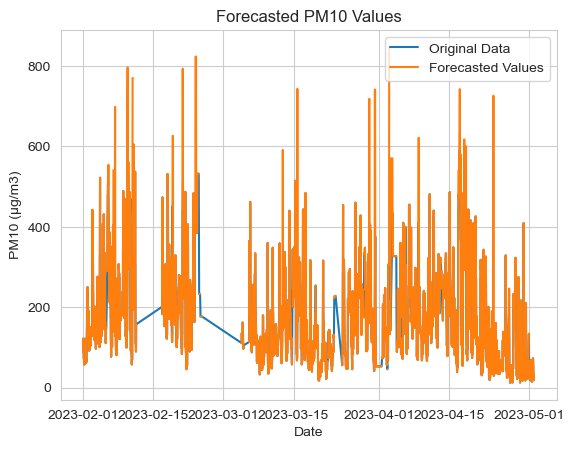

In [106]:
plt.plot(df_filled_1.index, df_filled_1['PM10 (µg/m3)'], label='Original Data')

plt.plot(df_filled.index, df_filled['PM10 (µg/m3)'], label='Forecasted Values')

plt.xlabel('Date')
plt.ylabel('PM10 (µg/m3)')
plt.title('Forecasted PM10 Values')
plt.legend()

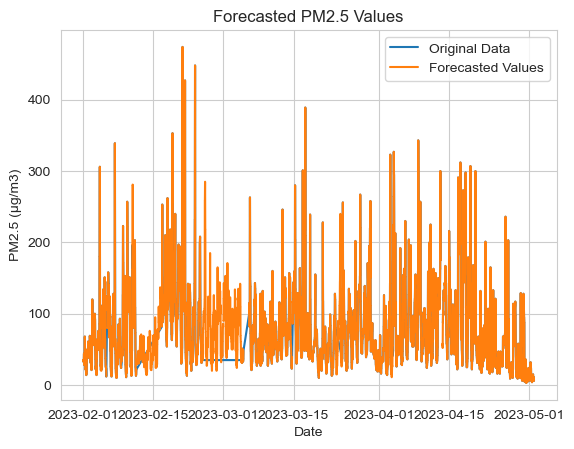

In [107]:
plt.plot(df_filled_2.index, df_filled_2['PM2.5 (µg/m3)'], label='Original Data')

plt.plot(df_filled.index, df_filled['PM2.5 (µg/m3)'], label='Forecasted Values')

plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('Forecasted PM2.5 Values')
plt.legend()

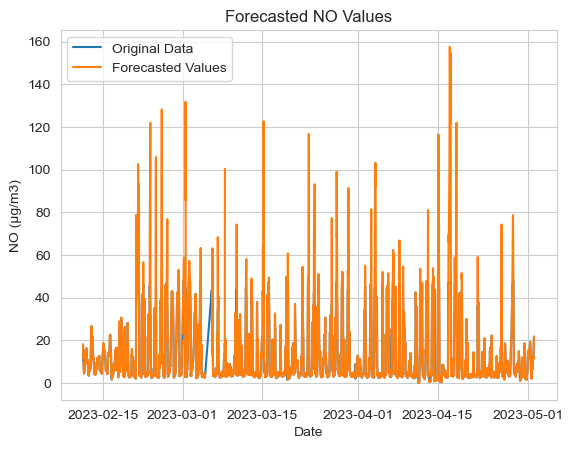

In [108]:
plt.plot(df_filled_3.index, df_filled_3['NO (µg/m3)'], label='Original Data')

plt.plot(df_filled.index, df_filled['NO (µg/m3)'], label='Forecasted Values')

plt.xlabel('Date')
plt.ylabel('NO (µg/m3)')
plt.title('Forecasted NO Values')
plt.legend()

In [90]:
forecast_table = df_filled_1[['PM10 (µg/m3)']].copy()
forecast_table.columns = ['Forecasted PM10']
forecast_table.index.name = 'Date'

forecast_table_string = forecast_table.to_string()

print(forecast_table_string)

                     Forecasted PM10
Date                                
2023-02-01 00:00:00             95.0
2023-02-01 00:15:00             95.0
2023-02-01 00:30:00             95.0
2023-02-01 00:45:00            122.0
2023-02-01 01:00:00            122.0
2023-02-01 01:15:00            122.0
2023-02-01 01:30:00            122.0
2023-02-01 01:45:00             90.0
2023-02-01 02:00:00             90.0
2023-02-01 02:15:00             90.0
2023-02-01 02:30:00             90.0
2023-02-01 02:45:00             72.0
2023-02-01 03:00:00             72.0
2023-02-01 03:15:00             72.0
2023-02-01 03:30:00             72.0
2023-02-01 03:45:00             72.0
2023-02-01 04:00:00             72.0
2023-02-01 04:15:00             72.0
2023-02-01 04:30:00             72.0
2023-02-01 04:45:00             58.0
2023-02-01 05:00:00             58.0
2023-02-01 05:15:00             58.0
2023-02-01 05:30:00             58.0
2023-02-01 05:45:00             58.0
2023-02-01 06:00:00             58.0
2

In [91]:
forecast_table = df_filled_1[['PM2.5 (µg/m3)']].copy()
forecast_table.columns = ['Forecasted PM2.5']
forecast_table.index.name = 'Date'

forecast_table_string = forecast_table.to_string()

print(forecast_table_string)

                     Forecasted PM2.5
Date                                 
2023-02-01 00:00:00              35.0
2023-02-01 00:15:00              35.0
2023-02-01 00:30:00              35.0
2023-02-01 00:45:00              34.0
2023-02-01 01:00:00              34.0
2023-02-01 01:15:00              34.0
2023-02-01 01:30:00              34.0
2023-02-01 01:45:00              35.0
2023-02-01 02:00:00              35.0
2023-02-01 02:15:00              35.0
2023-02-01 02:30:00              35.0
2023-02-01 02:45:00              32.0
2023-02-01 03:00:00              32.0
2023-02-01 03:15:00              32.0
2023-02-01 03:30:00              32.0
2023-02-01 03:45:00              44.0
2023-02-01 04:00:00              44.0
2023-02-01 04:15:00              44.0
2023-02-01 04:30:00              44.0
2023-02-01 04:45:00              28.0
2023-02-01 05:00:00              28.0
2023-02-01 05:15:00              28.0
2023-02-01 05:30:00              28.0
2023-02-01 05:45:00              33.0
2023-02-01 0

In [92]:
forecast_table = df_filled_1[['NO (µg/m3)']].copy()
forecast_table.columns = ['Forecasted NO']
forecast_table.index.name = 'Date'

forecast_table_string = forecast_table.to_string()

print(forecast_table_string)

                     Forecasted NO
Date                              
2023-02-01 00:00:00            NaN
2023-02-01 00:15:00            NaN
2023-02-01 00:30:00            NaN
2023-02-01 00:45:00            NaN
2023-02-01 01:00:00            NaN
2023-02-01 01:15:00            NaN
2023-02-01 01:30:00            NaN
2023-02-01 01:45:00            NaN
2023-02-01 02:00:00            NaN
2023-02-01 02:15:00            NaN
2023-02-01 02:30:00            NaN
2023-02-01 02:45:00            NaN
2023-02-01 03:00:00            NaN
2023-02-01 03:15:00            NaN
2023-02-01 03:30:00            NaN
2023-02-01 03:45:00            NaN
2023-02-01 04:00:00            NaN
2023-02-01 04:15:00            NaN
2023-02-01 04:30:00            NaN
2023-02-01 04:45:00            NaN
2023-02-01 05:00:00            NaN
2023-02-01 05:15:00            NaN
2023-02-01 05:30:00            NaN
2023-02-01 05:45:00            NaN
2023-02-01 06:00:00            NaN
2023-02-01 06:15:00            NaN
2023-02-01 06:30:00 